# Task-1 
Prediction using supervised ML

Predict the percentage of an student based on the no. of study hours.

This is a simple linear regression task as it involves just 2 variables.

Question-  What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# Importing Libraries for solution

In [6]:
import pandas as pd #pandas is for converting raw data into dataframe which make data easy to manipulate.
import numpy as np #numpy is for when we eant to use basic array manipulation
import matplotlib.pyplot as plt #matplotlib is for creating different graphs
%matplotlib inline 

In [7]:
# Reading data into notebook using pandas
url="http://bit.ly/w-data"
df=pd.read_csv(url)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Lets plot our 2D dataframe to see any pattern between our two variable(Hours vs Scores) 

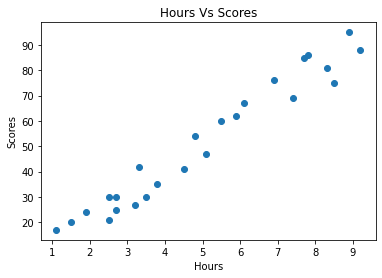

In [11]:
# ploting distribution b/w two variable 

plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title('Hours Vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

We can see from the graph there is positive relation b/w two variables 

Now let's perpare our data for modelling
Divide the data into dependent and independant variables

In [41]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now lets divide our data into train and test set for testing our model that we are going to apply here
Firstly we have to import the library for same.

In [42]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

Now we can apply our algo but before that we have to import library for same.

In [43]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 


LinearRegression()

Now we can plot again with regressor line so that we can see visually about the line.

/home/nishant/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


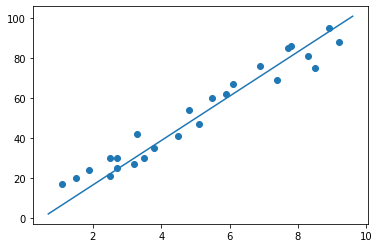

In [44]:

#ploting with line
fig, ax = plt.subplots()
ax.scatter(X, y)

# need a slope and c to fix the position of line
slope = reg.coef_
c = reg.intercept_

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(10)
ax.plot([x_min, x_max], [y_min, y_max])


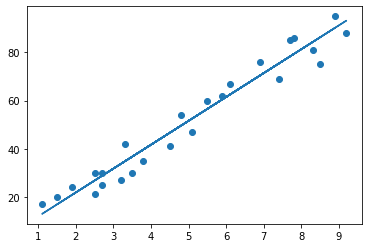

In [45]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [46]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [52]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [48]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
# You can also test with your own data
hours = [[9.25]]
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [50]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
